In [1]:
import numpy as np
import pandas as pd
import os
import time
import csv
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Flatten, 
                          Dense, Dropout, BatchNormalization, 
                          LeakyReLU, DepthwiseConv2D, MaxPooling2D,
                          Add, Input, Activation, GlobalAveragePooling2D,
                          Multiply, Reshape)

import cv2

from keras.utils import get_file
from keras.models import model_from_json

2023-05-27 23:32:33.632714: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-27 23:32:33.686708: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-27 23:32:35.770958: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
model = tf.keras.models.load_model('../04_Age_Prediction/08_models/best_custom.h5')

2023-05-27 23:33:19.905595: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 42995 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:1a:00.0, compute capability: 8.6
2023-05-27 23:33:19.906699: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46071 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-05-27 23:33:19.907706: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 46071 MB memory:  -> device: 2, name: NVIDIA RTX A6000, pci bus id: 0000:88:00.0, compute capability: 8.6
2023-05-27 23:33:19.908691: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 46071 MB memory:  -> device: 3, name: NVIDIA RTX A6000, pci bus id: 0000:89:00.0, 

# Automatically crop images (get_face())

In [19]:
def get_face(image_path, scale=0.1):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Load image in color mode
    img = cv2.imread(image_path, 1)
    faces = face_cascade.detectMultiScale(img, 1.1, 4)

    for (x, y, w, h) in faces:
        x_start = max(int(x - w * scale), 0)
        y_start = max(int(y - h * scale), 0)
        x_end = min(int(x + w * (1 + scale)), img.shape[1])
        y_end = min(int(y + h * (1 + scale)), img.shape[0])
        face_img = img[y_start:y_end, x_start:x_end]  # Crop the face from the image
        cv2.imwrite('cropped_face.jpg', face_img)  # Save the cropped face to an image file
        return face_img

In [27]:
def predict_age(model, img_path):
    img_size = (200, 200)
    face_img = get_face(img_path)
    if face_img is None:
        print("No face detected in the image.")
        return None

    # Display the image
    plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
    plt.show()

    img = Image.fromarray(face_img)
    img = img.resize(img_size)
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array, verbose=0)
    return prediction

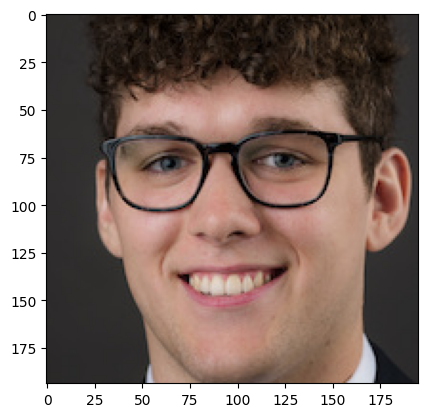

31.700346

In [28]:
predict_age(model, "../02_Data/Test Photos/" + "sam.jpg")[0][0]

# Not using get_face()

In [17]:
def predict_age(model, img):
    img_size = (200, 200)
    # No need to call get_face. Instead, resize the entire image
    img = img.resize(img_size)

    # Display the image
    plt.imshow(img)
    plt.show()

    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array, verbose=0)
    return prediction


Image: robert5.jpg


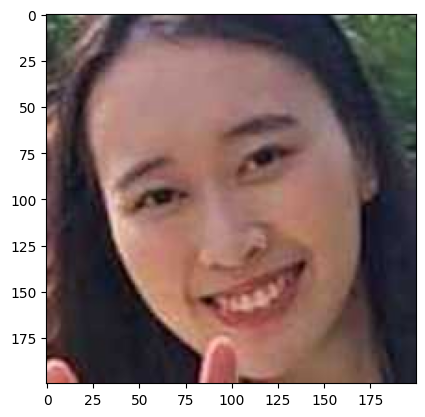

Predicted age: 26.935861587524414

Image: sam.jpg


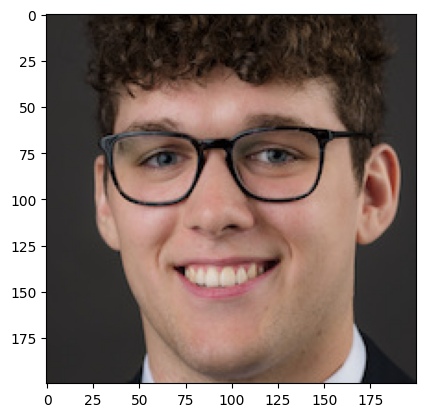

Predicted age: 37.22686767578125

Image: ellensister-child.jpg


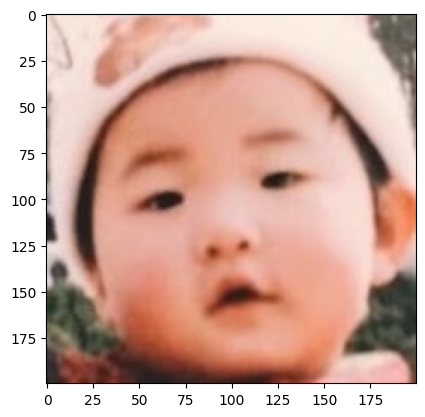

Predicted age: 23.46747398376465

Image: robert4.jpg


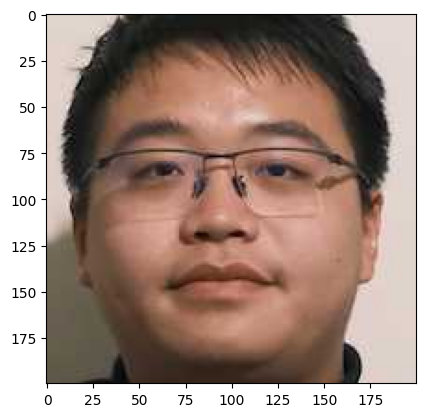

Predicted age: 30.93800926208496

Image: sakaguchi-riu.jpg


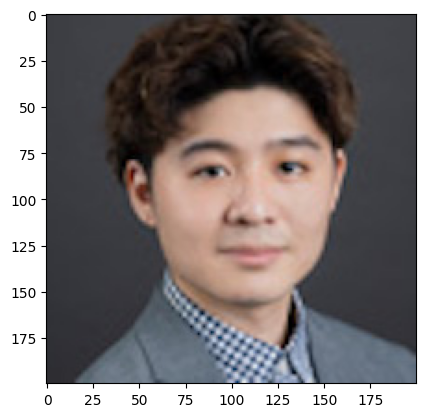

Predicted age: 23.850942611694336

Image: ruben-child.jpg


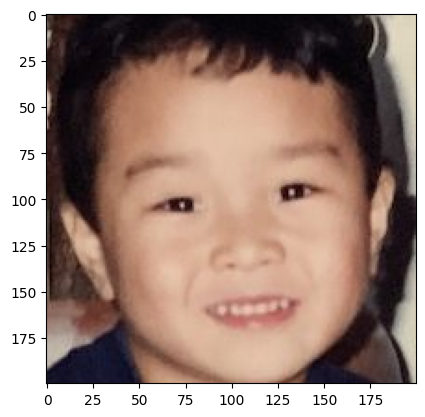

Predicted age: 12.448163986206055

Image: nakano-ruben.jpg


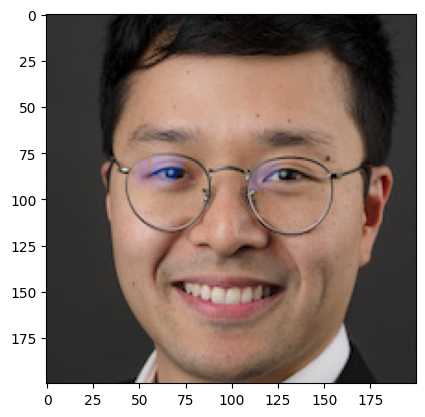

Predicted age: 32.85908508300781

Image: sam-child.jpg


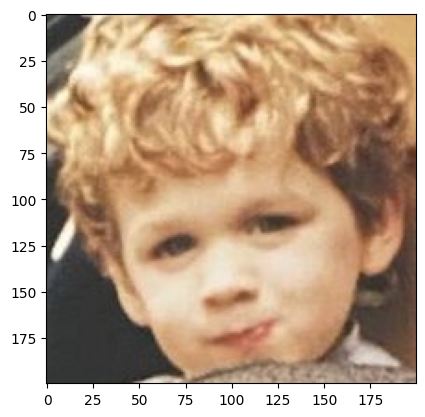

Predicted age: 61.41185760498047

Image: ellensister-child2.jpg


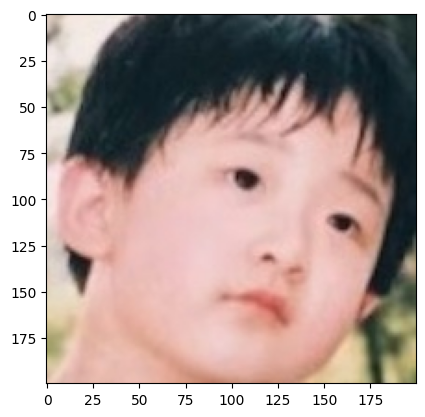

Predicted age: 24.317258834838867

Image: robert1.jpg


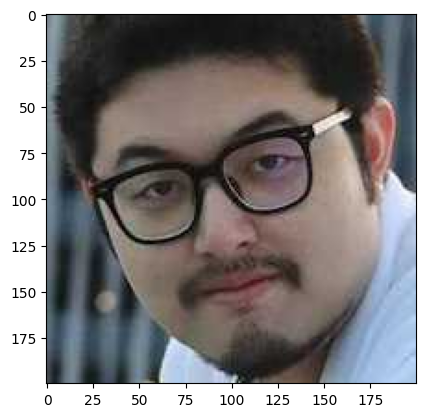

Predicted age: 26.570880889892578

Image: sheena-kiran.jpg


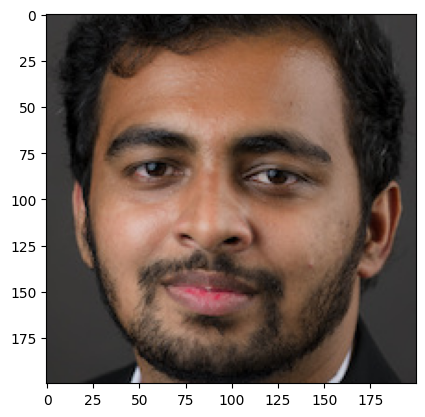

Predicted age: 25.195602416992188

Image: paspanthong-bannasorn.jpg


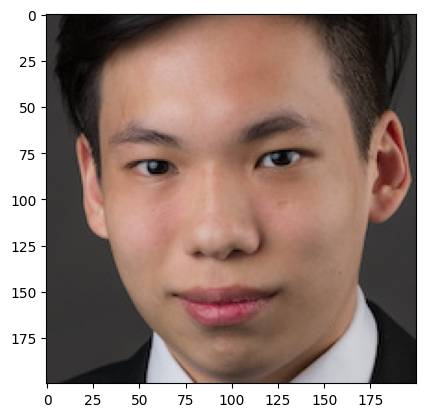

Predicted age: 12.346402168273926

Image: vivian-child.jpg


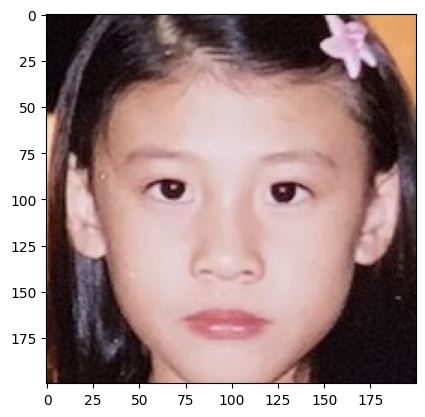

Predicted age: 11.761457443237305

Image: alli-child.jpg


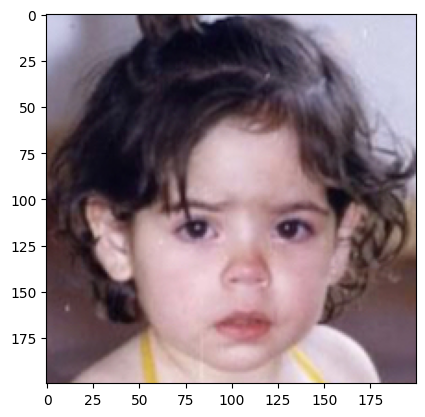

Predicted age: 16.160856246948242

Image: ALLI.jpg


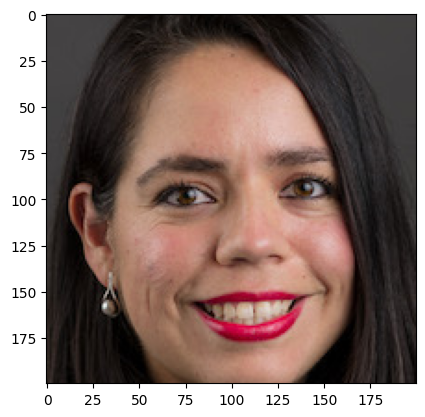

Predicted age: 37.47633743286133

Image: li-jiusi.jpg


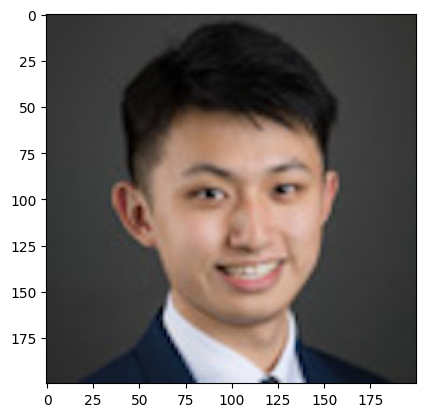

Predicted age: 25.34716033935547

Image: robert3.jpg


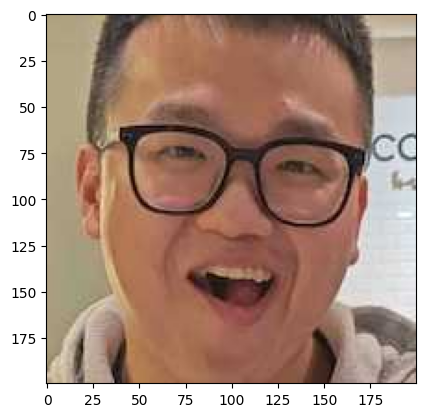

Predicted age: 46.662044525146484

Image: boss-child.jpg


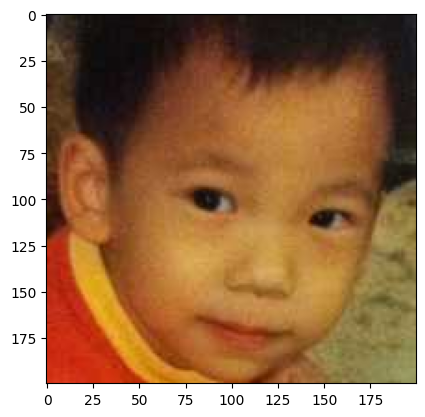

Predicted age: 16.228038787841797

Image: wang-shirley.jpg


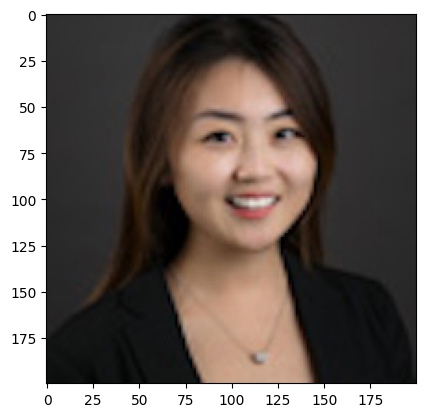

Predicted age: 51.42781066894531

Image: robert2.jpg


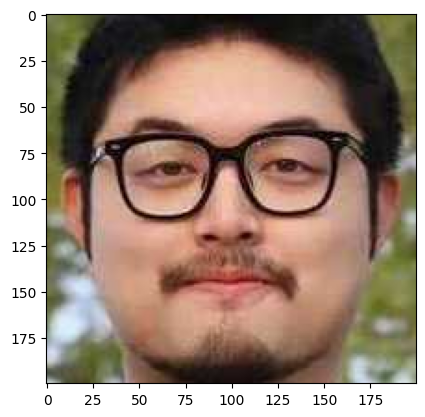

Predicted age: 33.32768630981445

Image: sharika-child.jpg


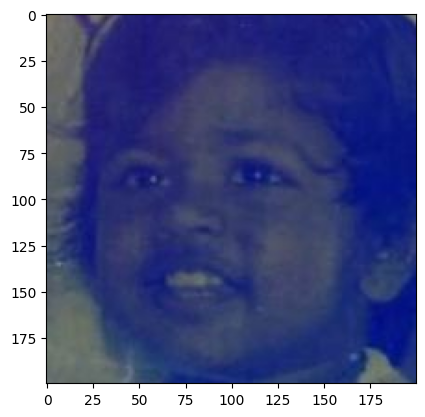

Predicted age: 35.79404830932617



In [18]:
import os
from PIL import Image

# Get the list of all files in the directory
img_dir = "../02_Data/Test Photos/"
img_files = os.listdir(img_dir)

# Loop through all files
for img_file in img_files:
    # Ensure the file is an image (for example, by checking the file extension)
    if img_file.endswith((".png", ".jpg", ".jpeg")):
        # Create the full image path
        img_path = os.path.join(img_dir, img_file)

        # Open the image using PIL
        image = Image.open(img_path)

        # Predict the age and print the image
        print(f"Image: {img_file}")
        prediction = predict_age(model, image)

        # Print the prediction
        print(f"Predicted age: {prediction[0][0]}\n")
